In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
%matplotlib inline

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.drop(labels=['car_ID','CarName'],axis=1,inplace=True)

In [5]:
df.shape

(205, 24)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [8]:
df.duplicated().sum()

1

In [9]:
df_quant_cols = df[['symboling','wheelbase','carlength','carwidth','carheight','curbweight',
                  'enginesize','boreratio','stroke','compressionratio','horsepower',
                  'peakrpm','citympg','highwaympg','price']]
df_cat_cols = df.drop(df_quant_cols.columns,axis=1)

print(df_quant_cols.columns, df_cat_cols.columns, sep="\n")

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')
Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')


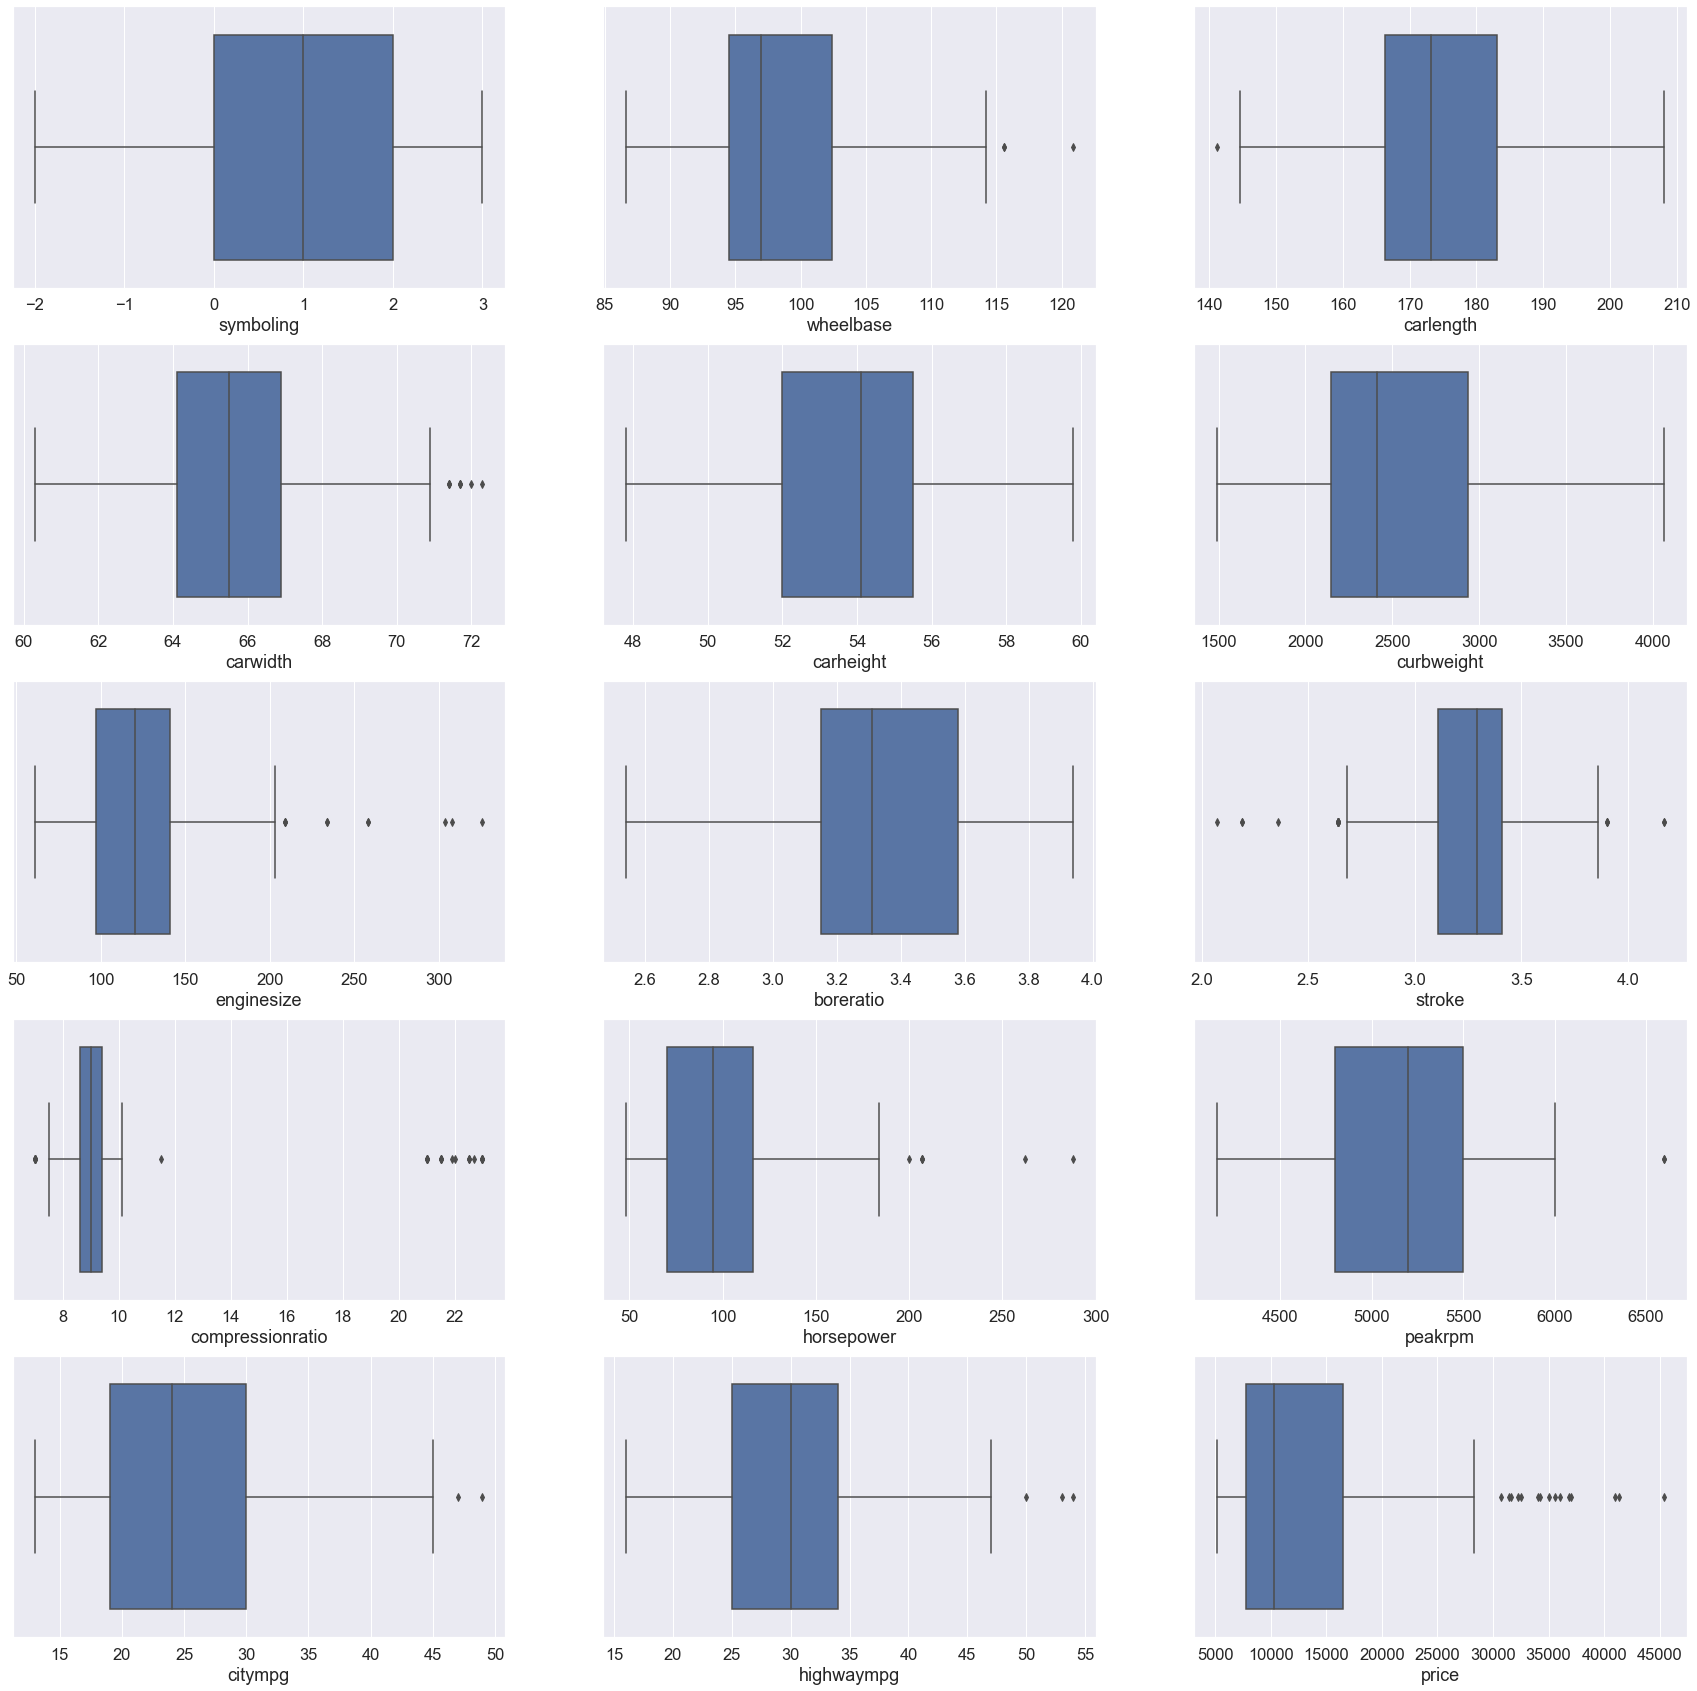

In [10]:
# Analyzing Quantitative variables.
plt.figure(figsize=(30, 30))
sns.set(font_scale=1.5)
ind = 1

for col in df_quant_cols.columns:
    plt.subplot(5, 3, ind)
    sns.boxplot(x=df_quant_cols[col])
    ind += 1

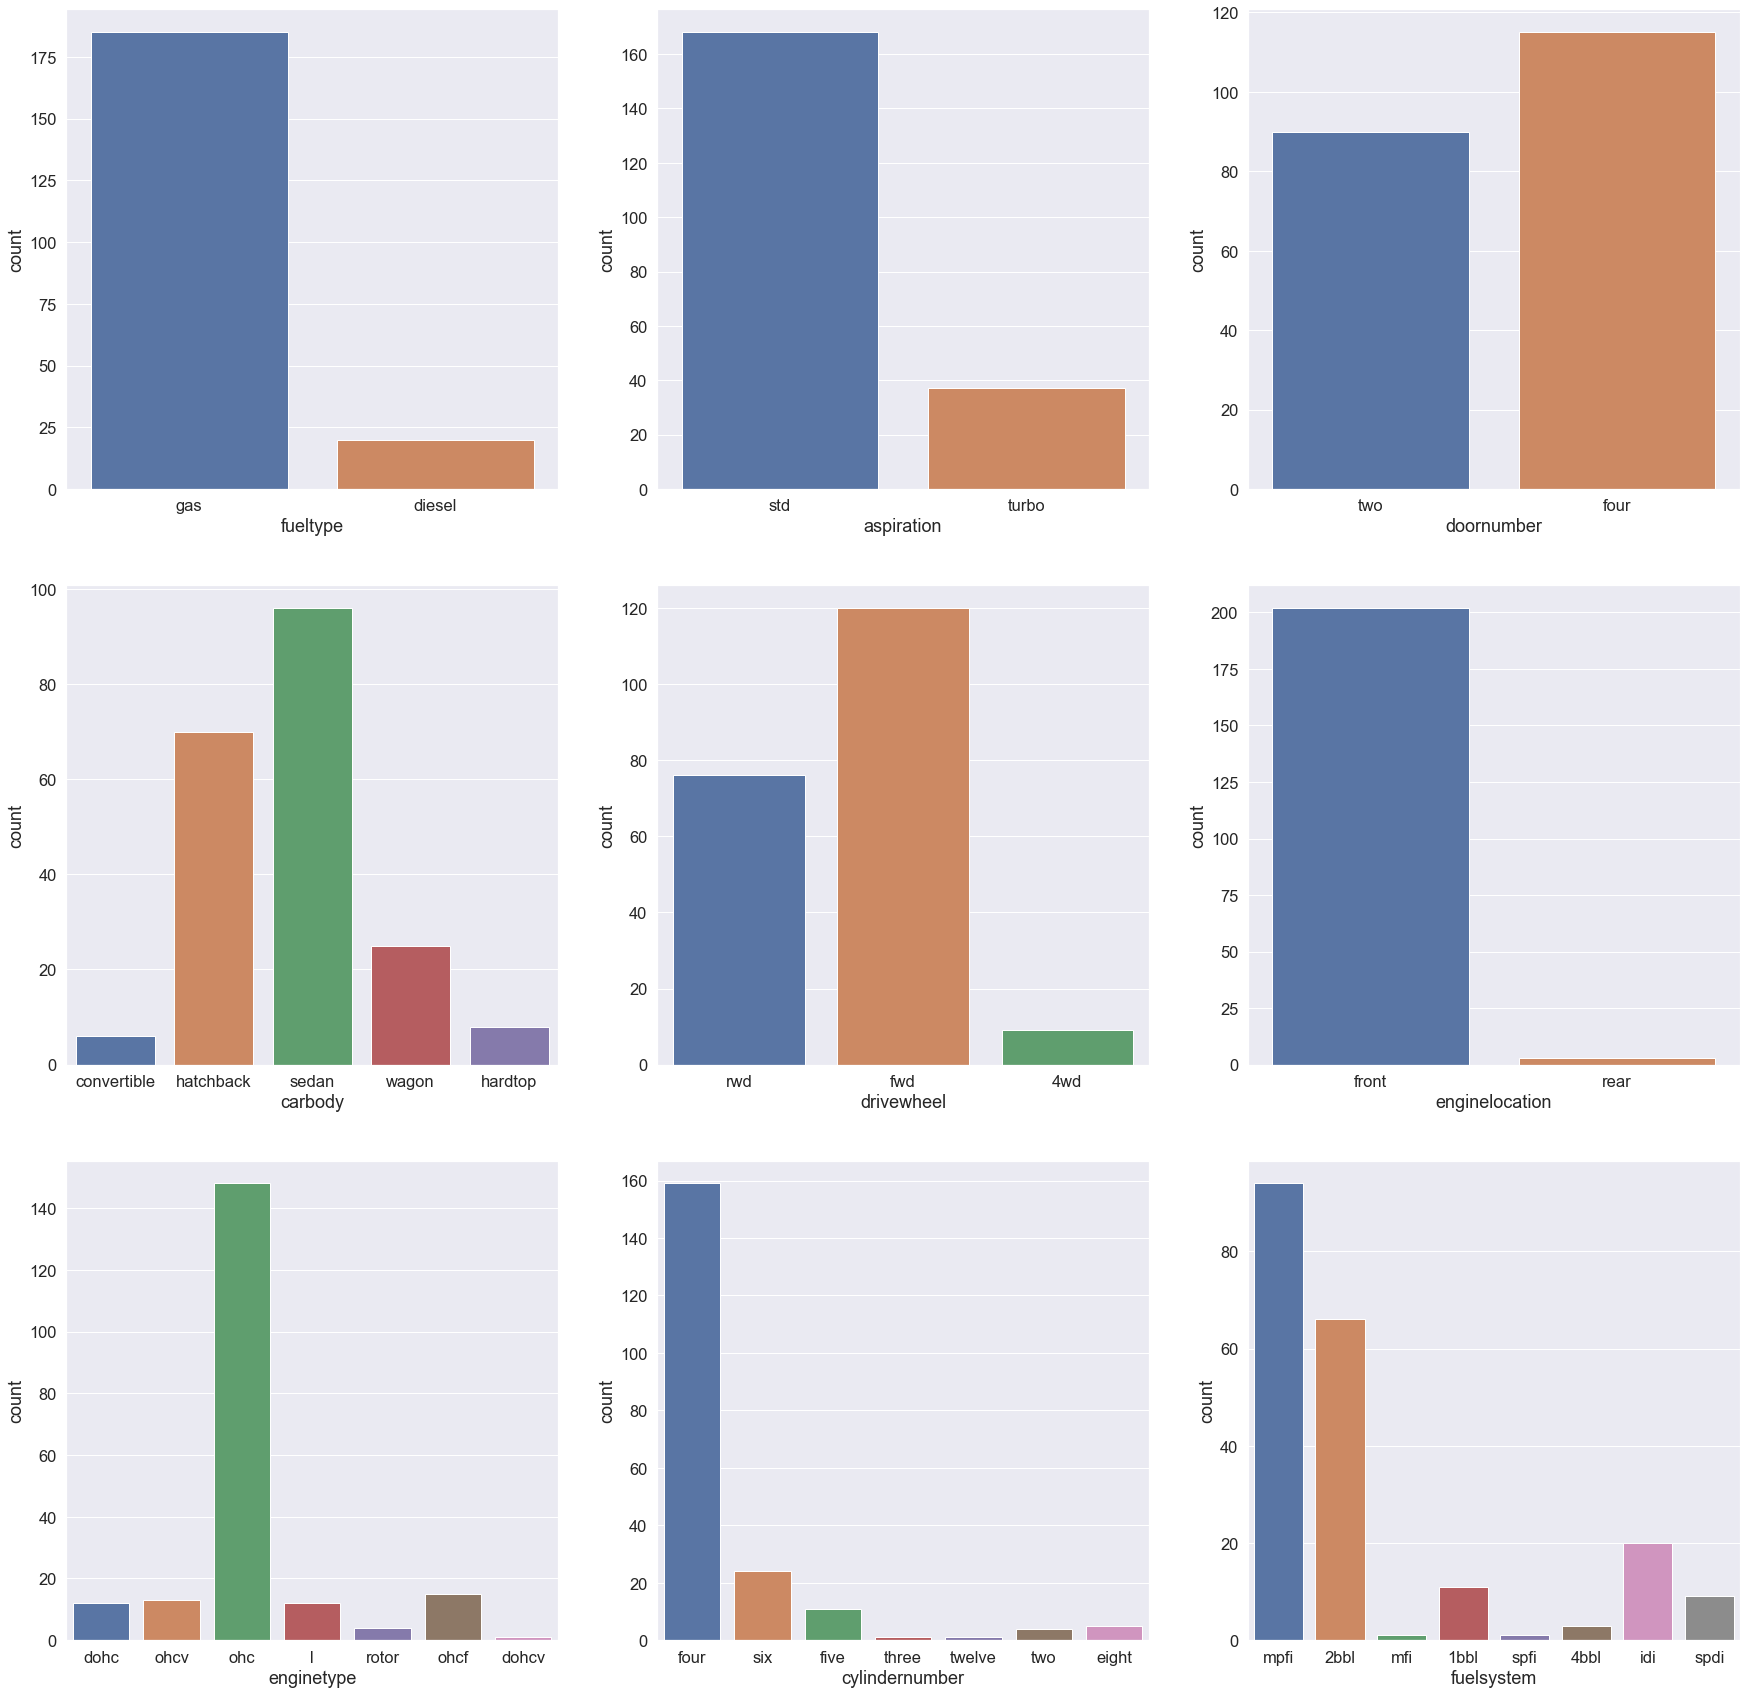

In [11]:
# Analyzing categorical variables.
plt.figure(figsize=(30, 30))
sns.set(font_scale=1.5)
ind = 1

for col in df_cat_cols.columns:
    plt.subplot(3, 3, ind)
    sns.countplot(x=df_cat_cols[col])
    ind += 1
    
sns.set(font_scale=1)

C:\Users\home\anaconda1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew of target variable: 1.7776781560914454


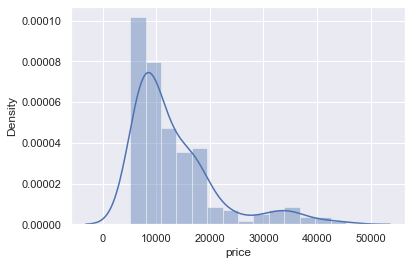

In [12]:
# Checking target variable's distribution.
sns.distplot(df.price)
print("Skew of target variable:",df.price.skew())

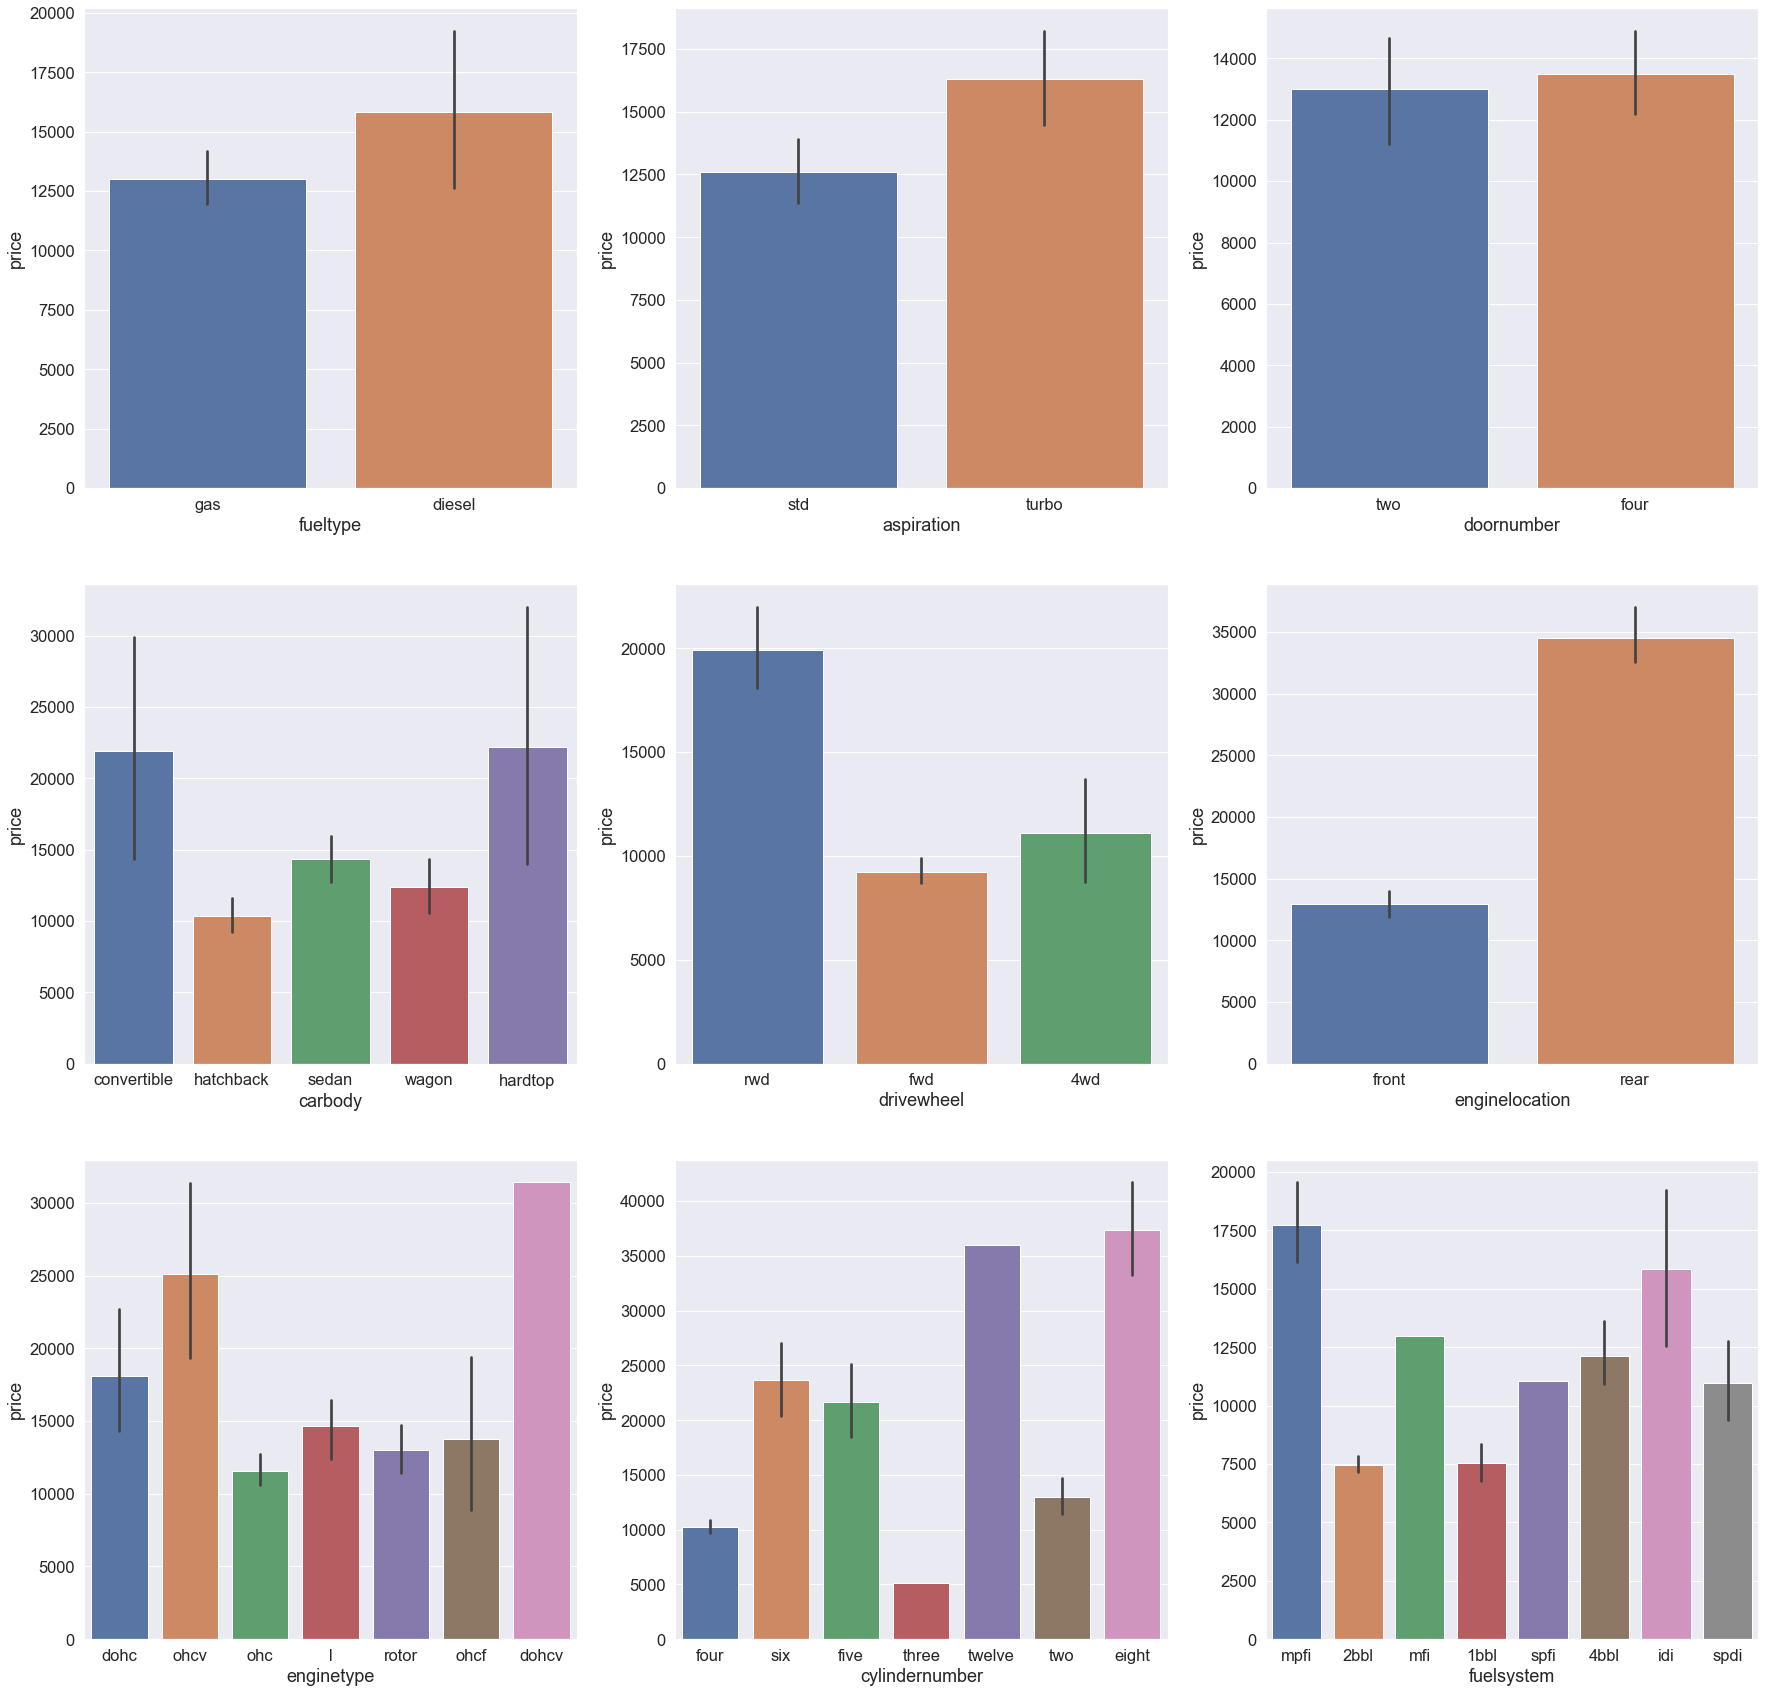

In [13]:
plt.figure(figsize=(30, 30))
sns.set(font_scale=1.5)
ind = 1

for col in df_cat_cols.columns:
    plt.subplot(3, 3, ind)
    sns.barplot(x=df[col], y=df.price)
    ind += 1

sns.set(font_scale=1)

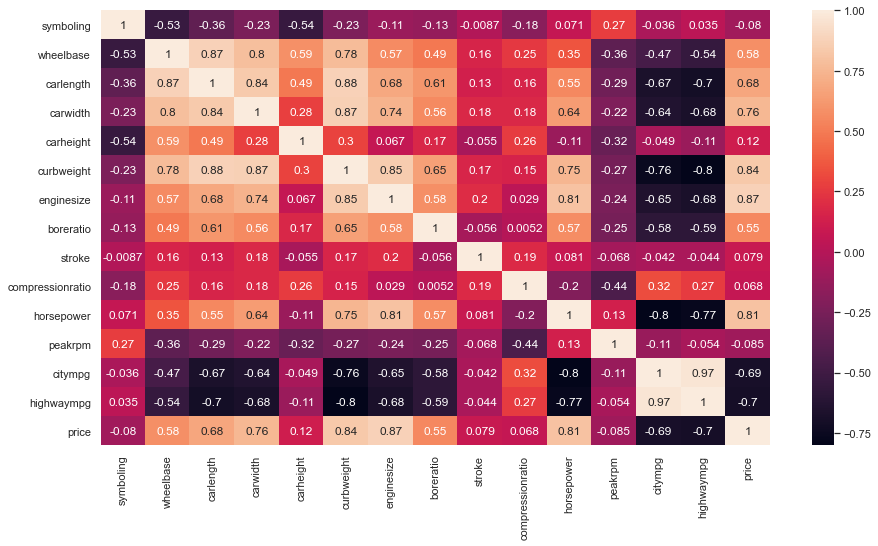

In [14]:
fig,ax = plt.subplots(figsize=(15,8))
sns.heatmap(df_quant_cols.corr(), annot=True)

In [15]:
oe=OrdinalEncoder().fit_transform(df_cat_cols)
oe

array([[1., 0., 1., ..., 0., 2., 5.],
       [1., 0., 1., ..., 0., 2., 5.],
       [1., 0., 1., ..., 5., 3., 5.],
       ...,
       [1., 0., 0., ..., 5., 3., 5.],
       [0., 1., 0., ..., 3., 3., 3.],
       [1., 1., 0., ..., 3., 2., 5.]])

In [16]:
df_cat_cols=pd.DataFrame(data=oe.astype(int),columns=df_cat_cols.columns)

In [17]:
# Joining both Quantitative and Categorical variables.
df_new = df_quant_cols.join(df_cat_cols,how='right')

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df_new.drop('price',axis=1)
y = df_new.price
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
reg = LinearRegression()
reg.fit(X_train,y_train)
print("Train Score :", reg.score(X_train,y_train))
print("Test Score :", reg.score(X_test,y_test))

Train Score : 0.9025556520457333
Test Score : 0.7772248095190826


In [21]:
y_pred = reg.predict(X_train)
df_residuals = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df_residuals.insert(2,"ErrorTerm",(df_residuals.Actual - df_residuals.Predicted))

Residual mean : 1.3265312967322222e-11


C:\Users\home\anaconda1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


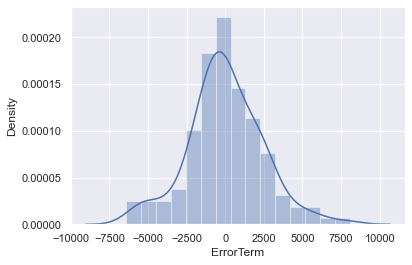

In [22]:
sns.distplot(df_residuals.ErrorTerm)
print("Residual mean :", df_residuals.ErrorTerm.mean())

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 1820.6414608011944
Mean Squared Error: 5849585.546167311
Root Mean Squared Error: 2418.5916451867834


In [24]:
cdf = df[["enginesize","horsepower","price"]]
cdf.head(10)

,enginesize,horsepower,price
0,130,111,13495.000
1,130,111,16500.000
2,152,154,16500.000
3,109,102,13950.000
4,136,115,17450.000
5,136,110,15250.000
6,136,110,17710.000
7,136,110,18920.000
8,131,140,23875.000
9,131,160,17859.167


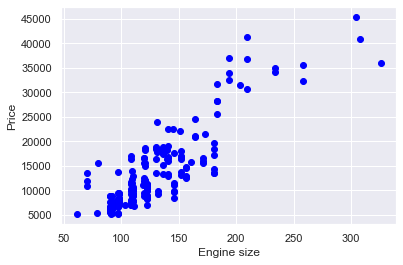

In [25]:
plt.scatter(cdf["enginesize"], cdf["price"],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Price")
plt.show()

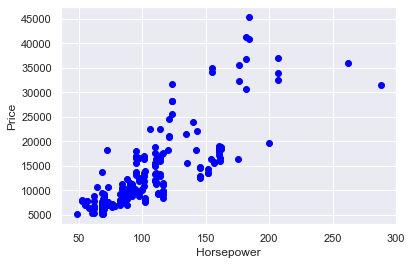

In [26]:
plt.scatter(cdf["horsepower"], cdf["price"],  color='blue')
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.show() 

In [27]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

x = np.asanyarray(train[['enginesize','horsepower']])
y = np.asanyarray(train[['price']])
regr.fit (x,y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[120.66470524  66.44486944]]
Intercept:  [-8815.58483163]


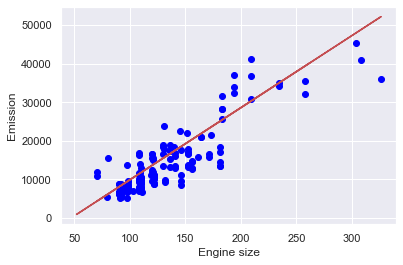

In [29]:
plt.scatter(train["enginesize"], train["price"],  color='blue')
plt.plot(x,regr.coef_[0][0]*x + regr.coef_[0][1]*x + regr.intercept_[0],'-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [30]:
y_hat= regr.predict(test[['enginesize','horsepower']])
x = np.asanyarray(test[['enginesize','horsepower']])
y = np.asanyarray(test[['price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 11008218.78
Variance score: 0.67


In [31]:
test_car_features = [200,200]
test_car_price = (regr.coef_[0][0]*test_car_features[0] + regr.coef_[0][1]*test_car_features[1] + regr.intercept_[0])
print("Aracın fiyat tahmini: ",int(test_car_price),"$")

Aracın fiyat tahmini:  28606 $


In [32]:
import numpy as np # linear algebra
import pandas as pd #

In [33]:
dataset=pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [34]:
X=dataset.iloc[:,1:2].values
y=dataset.iloc[:,2].values 
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg2=PolynomialFeatures(degree=2)
X_poly=poly_reg2.fit_transform(X)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression()

In [38]:
poly_reg3=PolynomialFeatures(degree=3)
X_poly3=poly_reg3.fit_transform(X)
lin_reg_3=LinearRegression()
lin_reg_3.fit(X_poly3,y)

LinearRegression()

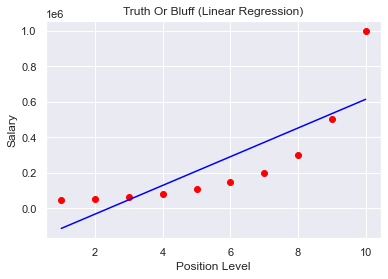

In [39]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.title('Truth Or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

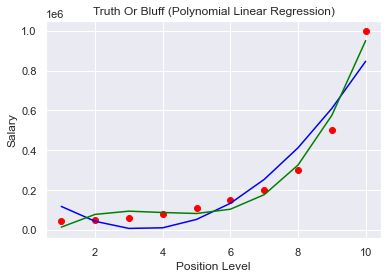

In [40]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg2.fit_transform(X)),color='blue')
plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)),color='green')
plt.title('Truth Or Bluff (Polynomial Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

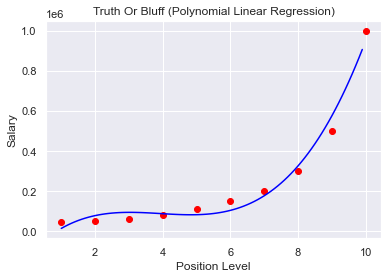

In [41]:
X_grid=np.arange(min(X),max(X),0.1) # This will give us a vector.We will have to convert this into a matrix 
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X_grid,lin_reg_3.predict(poly_reg3.fit_transform(X_grid)),color='blue')
#plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)),color='green')
plt.title('Truth Or Bluff (Polynomial Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [42]:
lin_reg.predict([[6.5]])

array([330378.78787879])

In [43]:
lin_reg_2.predict(poly_reg2.fit_transform([[6.5]]))

array([189498.10606061])

In [44]:
lin_reg_3.predict(poly_reg3.fit_transform([[6.5]]))

array([133259.46969697])

# Loan approval decision tree

In [45]:
lp = pd.read_csv("loanapproval.csv")

In [46]:
lp

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [47]:
lp.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
lp = lp.dropna()

In [49]:
lp.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

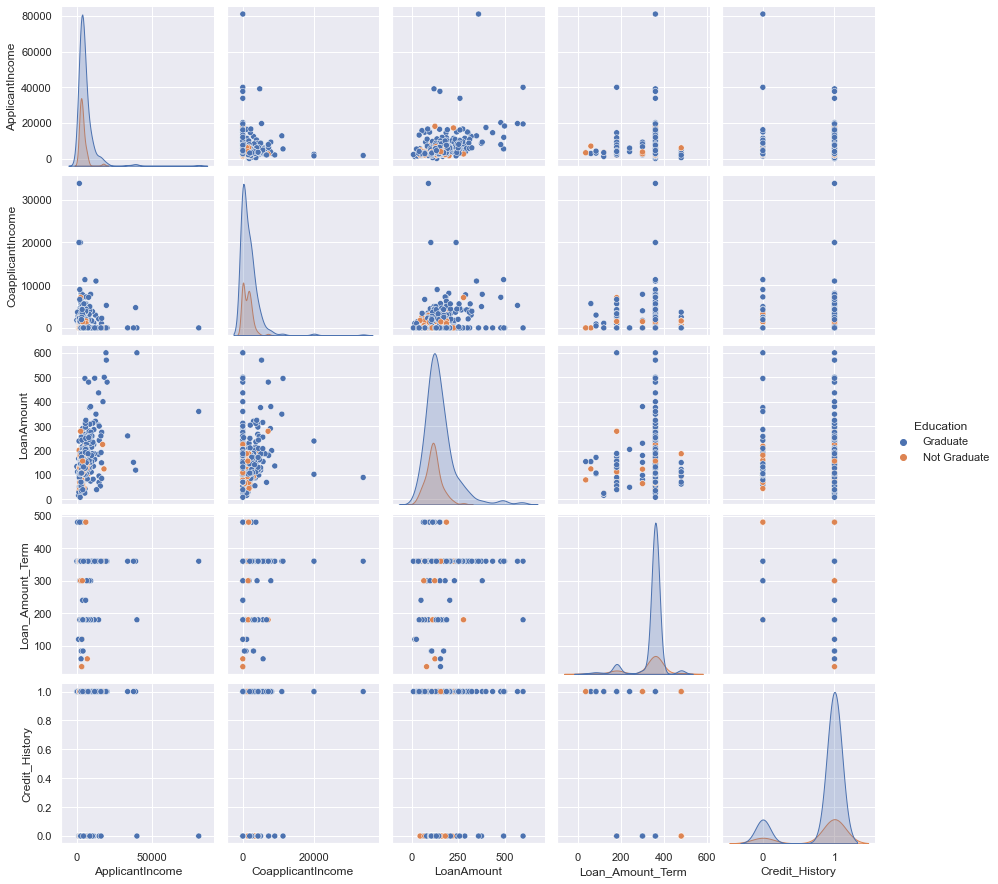

In [50]:
sns.pairplot(lp, hue="Education")
plt.show()

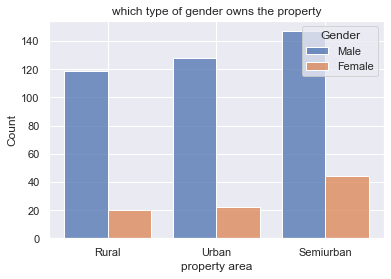

In [51]:
sns.histplot(data = lp, x = "Property_Area", hue = "Gender", multiple = "dodge", shrink = 0.8)
plt.title("which type of gender owns the property")
plt.xlabel("property area")
plt.show()

In [52]:
income = lp.groupby('Education')['ApplicantIncome'].sum()

In [53]:
income = pd.DataFrame(income)

In [54]:
income

,ApplicantIncome
Education,
Graduate,2197661
Not Graduate,377170


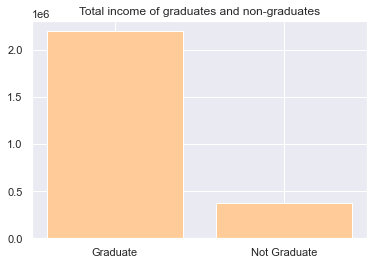

In [55]:
plt.bar(income.index, income["ApplicantIncome"], color = "#ffcc99")
plt.title("Total income of graduates and non-graduates")
plt.show()

C:\Users\home\anaconda1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


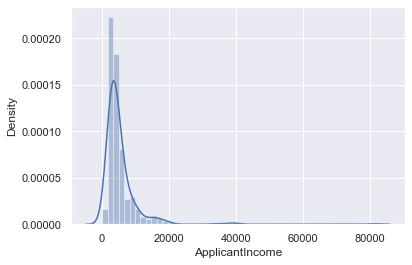

In [56]:
sns.distplot(lp["ApplicantIncome"])

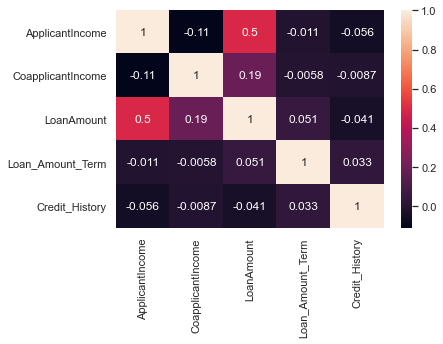

In [57]:
sns.heatmap(lp.corr(), annot = True)

In [58]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [59]:
lp.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [60]:
lp["Loan_Status"] = lp["Loan_Status"].astype('category')
lp["Loan_Status"] = lp["Loan_Status"].cat.codes

<ipython-input-60-05b79fa690db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lp["Loan_Status"] = lp["Loan_Status"].astype('category')
<ipython-input-60-05b79fa690db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lp["Loan_Status"] = lp["Loan_Status"].cat.codes


In [61]:
lp["Loan_Status"]

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int8

In [62]:
lp["Self_Employed"] = lp["Self_Employed"].astype('category')
lp["Self_Employed"] = lp["Self_Employed"].cat.codes

<ipython-input-62-2c5d54cecf9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lp["Self_Employed"] = lp["Self_Employed"].astype('category')
<ipython-input-62-2c5d54cecf9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lp["Self_Employed"] = lp["Self_Employed"].cat.codes


In [63]:
X=pd.DataFrame(lp, columns=['Self_Employed','ApplicantIncome','LoanAmount','Credit_History'])
Y=pd.DataFrame(lp, columns=["Loan_Status"])

In [64]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10) # 70% training and 30% test

In [65]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

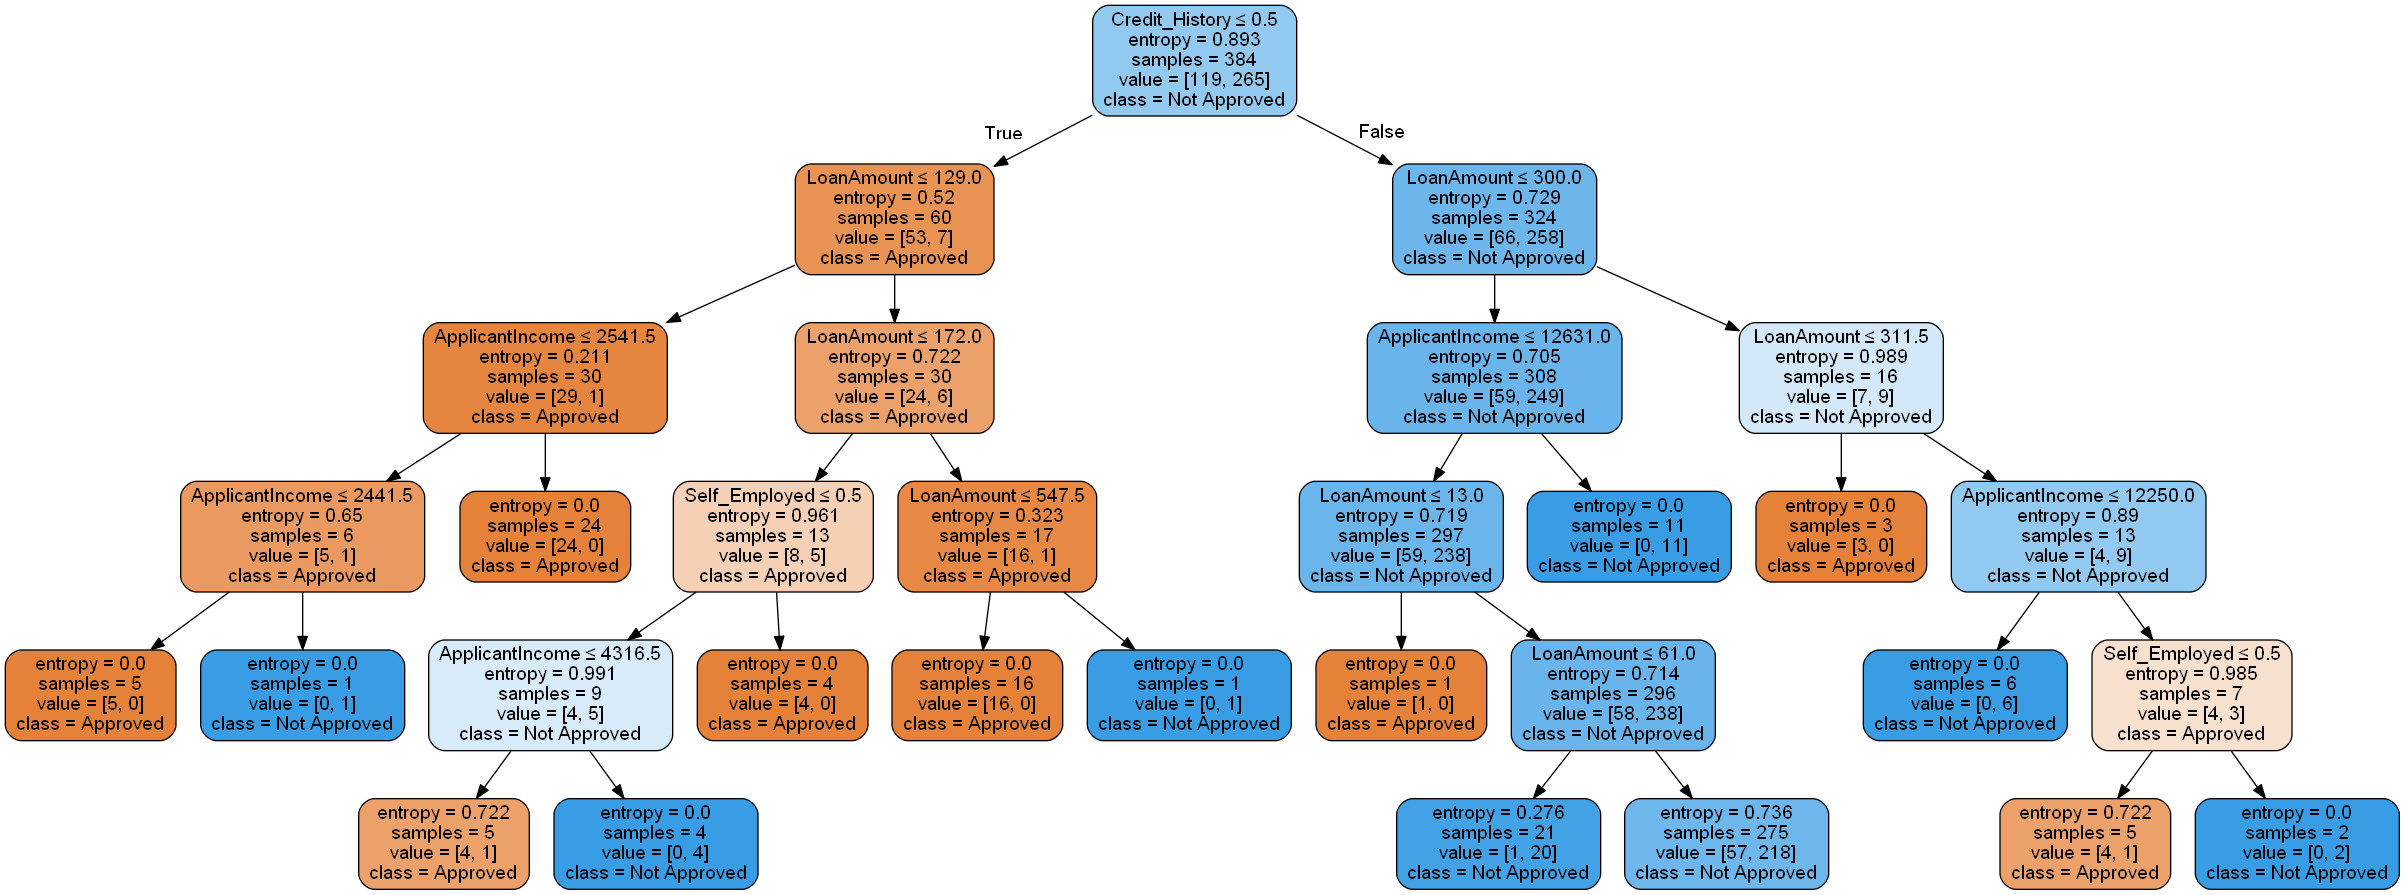

In [66]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = ['Self_Employed','ApplicantIncome','LoanAmount','Credit_History'],
                class_names=['Approved','Not Approved'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('loanapproval.png')
Image(graph.create_png())